# TITANIC SURVIVAL PREDICTION
By :- Praveen Choudhary

## Project Description




In [183]:
# import some libraries for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [184]:
titanic_data = pd.read_csv("C:\\Users\\praveen choudhary\\Desktop\\research\\Project\\Project data\\Titanic.csv")
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


## Summary About Data

In [185]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [186]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [187]:
titanic_data.duplicated().sum()

0

In [188]:
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,False,True,False,False,False,False,True,False


In [189]:
titanic_data.count()

PassengerId    418
Survived       418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64

## Data Analysis
 In this stage, we will thoroughly examine the dataset, conduct various analyses, and prepare the data for modeling. This includes cleaning and encoding the data, as well as gaining insights through descriptive statistics and data visualization.

### Data Cleaning
##### Hand Deleted Values
**Cabin** : In this column 327 rows of data is missing which is approx. 78 percent. Because of max number of rows are missing so its not a value able data. we drop this cloumn.

**Age** : In this column 86 rows of data is missing which is approx. 21 percent. If we delete this column also then we loss 79 percent of data age. so we random values fill in the missing data  

**Fare** : In this column 1 row of data is missing. this will be fill by mean




In [190]:
titanic_data.drop(columns=['Cabin'],inplace=True)

In [191]:
Test_age=np.random.randint(titanic_data['Age'].mean()-titanic_data['Age'].std(),titanic_data['Age'].mean()+titanic_data['Age'].std(),86)
# 86 is missing rows of age

In [192]:
titanic_data['Age'][titanic_data['Age'].isnull()]=Test_age

In [193]:
titanic_data['Fare'].fillna(titanic_data['Fare'].mean(),inplace=True)

In [194]:
titanic_data['Embarked'].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

In [195]:
titanic_data['Sex'].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

 Total Number Of Passenger Is : 418

**Number Of Members Survived**

0 : Not Survived

1 : Survievd

In [196]:
titanic_data['Survived'].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

In [197]:
titanic_data['Pclass'].value_counts()

Pclass
3    218
1    107
2     93
Name: count, dtype: int64

In [198]:
temp_pclass=titanic_data['Pclass'].unique()
for temp_value in temp_pclass:
    temp_p = titanic_data[titanic_data['Pclass']==temp_value]
    percentage_of_pclass=(temp_p['Survived'].sum()/len(temp_p))*100
    
    print(f"Percentage of passengers in the class {temp_value} that Survived : {percentage_of_pclass :.2f}%") 

Percentage of passengers in the class 3 that Survived : 33.03%
Percentage of passengers in the class 2 that Survived : 32.26%
Percentage of passengers in the class 1 that Survived : 46.73%


In [199]:
titanic_data['SibSp'].value_counts()

SibSp
0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: count, dtype: int64

**Now This Data Is More Precise** 

In [200]:
titanic_data.isnull().count()

PassengerId    418
Survived       418
Pclass         418
Name           418
Sex            418
Age            418
SibSp          418
Parch          418
Ticket         418
Fare           418
Embarked       418
dtype: int64

**Descriptive Statistics**

In [201]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.183014,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,13.221502,0.896760,0.981429,55.840500
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.250000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


**Data Visualization**

Text(0.5, 1.0, 'Parch')

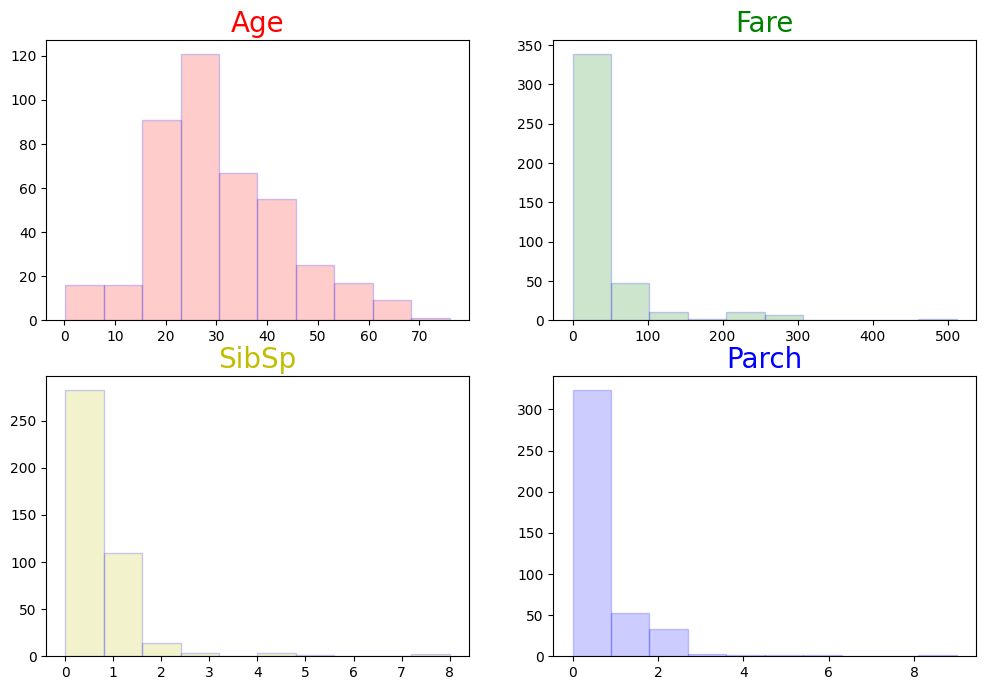

In [202]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.hist(titanic_data['Age'],color='r',edgecolor='b',alpha=0.2)
plt.title("Age",color='r',fontsize=20)

plt.subplot(2,2,2)
plt.hist(titanic_data['Fare'],color='g',edgecolor='b',alpha=0.2)
plt.title('Fare',color='g',fontsize=20)

plt.subplot(2,2,3)
plt.hist(titanic_data['SibSp'],color='y',edgecolor='b',alpha=0.2)
plt.title('SibSp',color='y',fontsize=20)

plt.subplot(2,2,4)
plt.hist(titanic_data['Parch'],color='b',edgecolor='b',alpha=0.2)
plt.title('Parch',color='b',fontsize=20)

1. The majority of the passengers were aged 20-30, with a significant number aged 30-50.
3. Most tickets cost around 0-50.
3. Around 100 passengers had one sibling.and majority of passengers had no siblings.
4. the majority had no spouse, with a small number having a spouse.

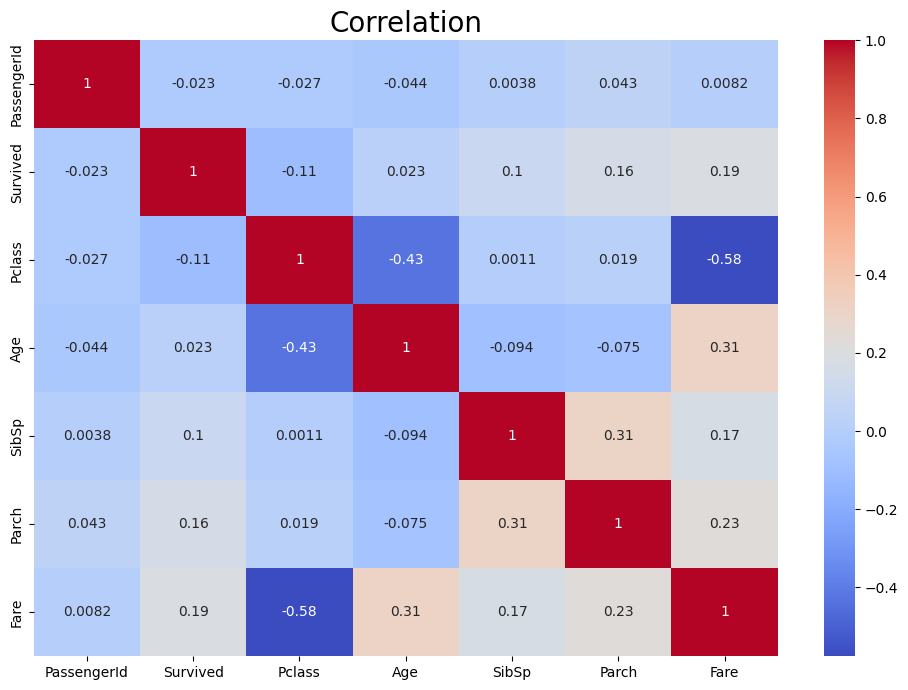

In [203]:
plt.figure(figsize=(12,8))
sns.heatmap(titanic_data.select_dtypes(include=['number']).corr(),annot=True,cmap='coolwarm')
plt.title("Correlation",fontsize=20)
plt.show()            

This heapmap chart highlight that, Pclass And Age or Pclass and Fare have medium negative correlation 

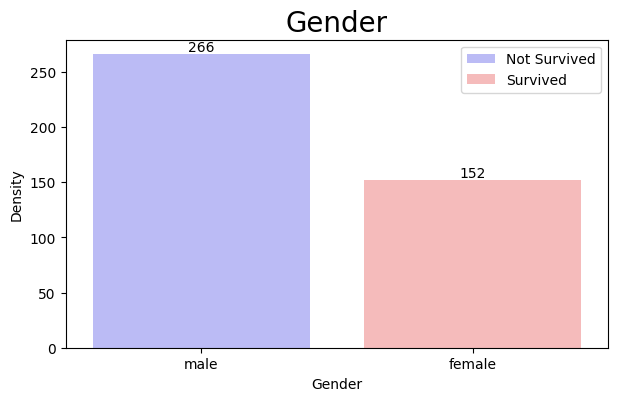

In [204]:
# Plot for Gender
plt.figure(figsize=(7,4))
color_gen={0: "Blue",1 : "red"}
countP_gender=sns.countplot(x='Sex',hue="Survived",data=titanic_data,palette=color_gen,alpha=0.3)
for temp_survival in countP_gender.containers:
    countP_gender.bar_label(temp_survival)
plt.xlabel("Gender")
plt.ylabel("Density")
plt.title("Gender",fontsize=20)
plt.legend(labels=['Not Survived','Survived'])

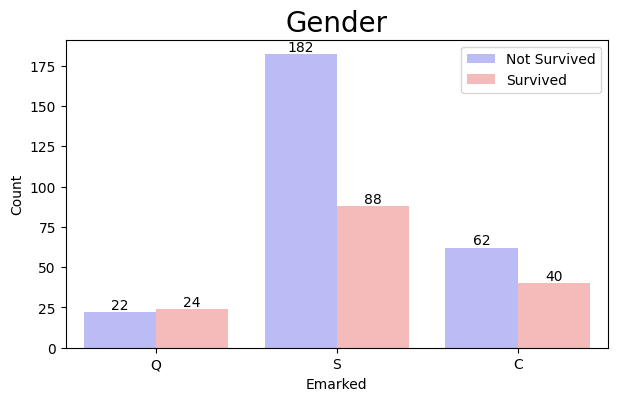

In [205]:
# Plot for Gender
plt.figure(figsize=(7,4))
color_gen={0: "Blue",1 : "red"}
countP_gender=sns.countplot(x='Embarked',hue="Survived",data=titanic_data,palette=color_gen,alpha=0.3)
for temp_survival in countP_gender.containers:
    countP_gender.bar_label(temp_survival)
plt.xlabel("Emarked")
plt.ylabel("Count")
plt.title("Gender",fontsize=20)
plt.legend(labels=['Not Survived','Survived'])

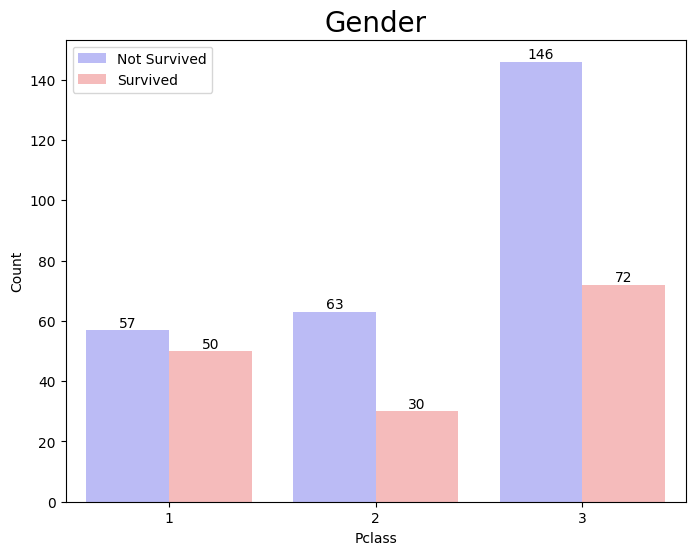

In [206]:
plt.figure(figsize=(8,6))
color_gen={0: "Blue",1 : "red"}
countP_gender=sns.countplot(x='Pclass',hue="Survived",data=titanic_data,palette=color_gen,alpha=0.3)
for temp_survival in countP_gender.containers:
    countP_gender.bar_label(temp_survival)
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.title("Gender",fontsize=20)
plt.legend(labels=['Not Survived','Survived'])

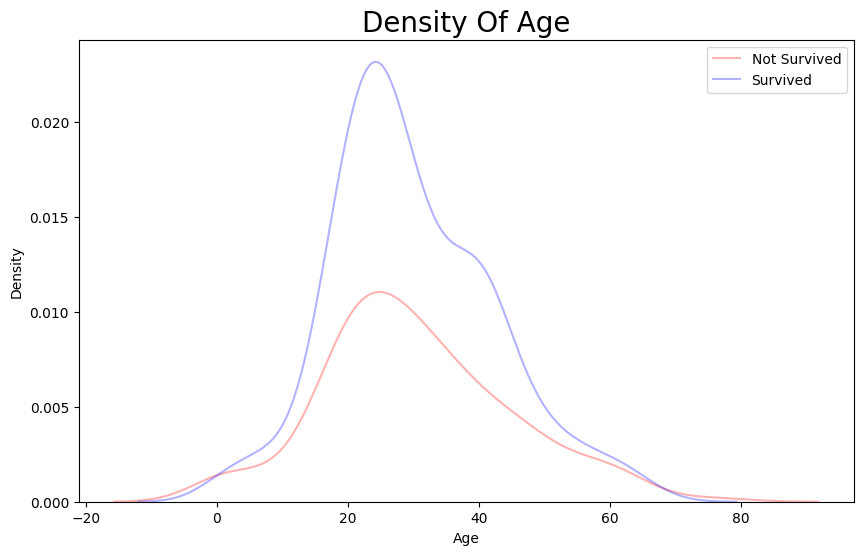

In [207]:
plt.figure(figsize=(10,6))
color_gen={0: "Blue",1 : "red"}
sns.kdeplot(data=titanic_data,x='Age',hue='Survived',palette=color_gen,alpha=0.3)
plt.title("Density Of Age",fontsize=20)
plt.legend(labels=['Not Survived','Survived'])

**Descriptive Analysis**

In [208]:
titanic_data.describe(include='O')

,Name,Sex,Ticket,Embarked
count,418,418,418,418
unique,418,2,363,3
top,"Kelly, Mr. James",male,PC 17608,S
freq,1,266,5,270


In [209]:
titanic_data.groupby('Sex')[['Survived','Pclass', 'Age', 'SibSp', 'Fare']].mean()

,Survived,Pclass,Age,SibSp,Fare
Sex,,,,,
female,1.0,2.144737,30.576250,0.565789,49.747699
male,0.0,2.334586,29.958308,0.379699,27.558326


In [210]:
titanic_data.groupby('Embarked')[['Survived','Pclass', 'Age', 'SibSp', 'Fare']].mean()

,Survived,Pclass,Age,SibSp,Fare
Embarked,,,,,
C,0.392157,1.794118,33.700980,0.421569,66.259765
Q,0.521739,2.869565,28.956522,0.195652,10.957700
S,0.325926,2.340741,29.062963,0.500000,28.257832


**Convert Catogrical To Numerical Data**

In [211]:
sex_dt = titanic_data['Sex'].replace({'male': 1, 'female': 0})

Embarked_dt = pd.get_dummies(titanic_data['Embarked'],drop_first=True)

**Dropping**

In [212]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [213]:

titanic_data.drop(columns=['Ticket','Name','Embarked','PassengerId','Sex'],inplace=True,axis=1)

In [214]:
titanic_data.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,34.5,0,0,7.8292
1,1,3,47.0,1,0,7.0000
2,0,2,62.0,0,0,9.6875
3,0,3,27.0,0,0,8.6625
4,1,3,22.0,1,1,12.2875
5,0,3,14.0,0,0,9.2250
6,1,3,30.0,0,0,7.6292
7,0,2,26.0,1,1,29.0000
8,1,3,18.0,0,0,7.2292
9,0,3,21.0,2,0,24.1500


In [215]:
titanic_df=pd.concat([titanic_data,sex_dt,Embarked_dt],axis=1)

In [216]:
titanic_df.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Q,S
0,0,3,34.5,0,0,7.8292,1,True,False
1,1,3,47.0,1,0,7.0000,0,False,True
2,0,2,62.0,0,0,9.6875,1,True,False
3,0,3,27.0,0,0,8.6625,1,False,True
4,1,3,22.0,1,1,12.2875,0,False,True
5,0,3,14.0,0,0,9.2250,1,False,True
6,1,3,30.0,0,0,7.6292,0,True,False
7,0,2,26.0,1,1,29.0000,1,False,True
8,1,3,18.0,0,0,7.2292,0,False,False
9,0,3,21.0,2,0,24.1500,1,False,True


Axis For Model

In [222]:
x = titanic_df.iloc[:,:-1] #independent
y = titanic_df.iloc[:, -1] #dependent


In [223]:
x.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Q
0,0,3,34.5,0,0,7.8292,1,True
1,1,3,47.0,1,0,7.0000,0,False
2,0,2,62.0,0,0,9.6875,1,True


In [224]:
y.head(3)

0    False
1     True
2    False
Name: S, dtype: bool

In [225]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [226]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .1,random_state=42)
logmodel  = LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression()

In [227]:
prediction = logmodel.predict(x_test)

In [240]:
print("Test Score :")
logmodel.score(x_test,y_test)

Test Score :


0.8095238095238095

In [239]:
print("Training Score :")
logmodel.score(x_train,y_train)

Training Score :


0.7845744680851063

In [230]:
logmodel.predict_proba(x_test)

array([[0.20260464, 0.79739536],
       [0.80550408, 0.19449592],
       [0.90291157, 0.09708843],
       [0.20608289, 0.79391711],
       [0.13632974, 0.86367026],
       [0.2688381 , 0.7311619 ],
       [0.22562832, 0.77437168],
       [0.39595049, 0.60404951],
       [0.30301626, 0.69698374],
       [0.2083116 , 0.7916884 ],
       [0.16226608, 0.83773392],
       [0.37723624, 0.62276376],
       [0.14296849, 0.85703151],
       [0.61361629, 0.38638371],
       [0.20164345, 0.79835655],
       [0.28687358, 0.71312642],
       [0.22511869, 0.77488131],
       [0.45296378, 0.54703622],
       [0.77458136, 0.22541864],
       [0.2338887 , 0.7661113 ],
       [0.28910381, 0.71089619],
       [0.40027681, 0.59972319],
       [0.14662123, 0.85337877],
       [0.28076664, 0.71923336],
       [0.14046949, 0.85953051],
       [0.91263207, 0.08736793],
       [0.43273217, 0.56726783],
       [0.38778644, 0.61221356],
       [0.11791943, 0.88208057],
       [0.28076664, 0.71923336],
       [0.

In [233]:
from sklearn.metrics import confusion_matrix

In [234]:
confusion_matrix(y_test,prediction)

array([[ 7,  6],
       [ 2, 27]], dtype=int64)

In [231]:
from sklearn.metrics import classification_report

In [236]:
print(classification_report(y_test,prediction),"\n")
print("Logistic Regression Accuracy :",logmodel.score(x_test,y_test)*100)

              precision    recall  f1-score   support

       False       0.78      0.54      0.64        13
        True       0.82      0.93      0.87        29

    accuracy                           0.81        42
   macro avg       0.80      0.73      0.75        42
weighted avg       0.81      0.81      0.80        42
 

Logistic Regression Accuracy : 80.95238095238095
